# Guided Project: Investigating Fandango Movie Ratings

Reference solution [on Github](https://github.com/dataquestio/solutions/blob/master/Mission288Solutions.ipynb)

## Is Fandango Still Inflating Ratings?

In October 2015, a data journalist named Walt Hickey analyzed movie ratings data and found strong evidence to suggest that Fandango's rating system was biased and dishonest ([Fandango](https://www.fandango.com/) is an online movie ratings aggregator). He published his analysis in [this article](https://fivethirtyeight.com/features/fandango-movies-ratings/) — a great piece of data journalism that's totally worth reading.

Fandango displays a 5-star rating system on their website, where the minimum rating is 0 stars and the maximum is 5 stars.

![1](https://s3.amazonaws.com/dq-content/288/s1gp_fdg_stars.png)

**Source: [Fandango](https://www.fandango.com/)**

Hickey found that there's a significant discrepancy between the number of stars displayed to users and the actual rating, which he was able to find in the HTML of the page. He was able to find that:

* The actual rating was almost always rounded up to the nearest half-star. For instance, a 4.1 movie would be rounded off to 4.5 stars, not to 4 stars, as you may expect.

* In the case of 8% of the ratings analyzed, the rounding up was done to the nearest whole star. For instance, a 4.5 rating would be rounded off to 5 stars.

* For one movie rating, the rounding off was completely bizarre: from a rating of 4 in the HTML of the page to a displayed rating of 5 stars.

![2](https://s3.amazonaws.com/dq-content/288/s1gp_actual_vs_displayed.png)

**Source: [FiveThirtyEight](https://fivethirtyeight.com/features/fandango-movies-ratings/)**

The two distributions above are displayed using a simple line plot, which is also a valid way to show the shape of a distribution. The variable being examined is movie rating, and for each unique rating we can see its relative frequency (percentage) on the y-axis of the graph. When an analysis report is intended for large audiences, relative frequencies (especially percentages) are preferred over absolute frequencies.

Both distributions above are strongly left skewed, suggesting that movie ratings on Fandango are generally high or very high. We can see there's no rating under 2 stars in the sample Hickey analyzed. The distribution of displayed ratings is clearly shifted to the right compared to the actual rating distribution, suggesting strongly that Fandango inflates the ratings under the hood.

Fandango's officials replied that the biased rounding off was caused by a bug in their system rather than being intentional, and they promised to fix the bug as soon as possible. Presumably, this has already happened, although we can't tell for sure since the actual rating value doesn't seem to be displayed anymore in the pages' HTML.

***In this project, we'll analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis.***


## Understanding the Data

One of the best ways to figure out whether there has been any change in Fandango's rating system after Hickey's analysis is to compare the system's characteristics previous and after the analysis. Fortunately, we have ready-made data for both these periods of time:

* Walt Hickey made the data he analyzed publicly available [on GitHub](https://github.com/fivethirtyeight/data/tree/master/fandango). We'll use the data he collected to analyze the characteristics of Fandango's rating system previous to his analysis.

* One of Dataquest's team members collected movie ratings data for movies released in 2016 and 2017. The data is publicly available [on GitHub](https://github.com/mircealex/Movie_ratings_2016_17) and we'll use it to analyze the rating system's characteristics after Hickey's analysis.

`fandango_score_comparison.csv` contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015.

Column | Definition
--- | -----------
FILM | The film in question
RottenTomatoes | The Rotten Tomatoes Tomatometer score  for the film
RottenTomatoes_User | The Rotten Tomatoes user score for the film
Metacritic | The Metacritic critic score for the film
Metacritic_User | The Metacritic user score for the film
IMDB | The IMDb user score for the film
Fandango_Stars | The number of stars the film had on its Fandango movie page
Fandango_Ratingvalue | The Fandango ratingValue for the film, as pulled from the HTML of each page. This is the actual average score the movie obtained.
RT_norm | The Rotten Tomatoes Tomatometer score  for the film , normalized to a 0 to 5 point system
RT_user_norm | The Rotten Tomatoes user score for the film , normalized to a 0 to 5 point system
Metacritic_norm | The Metacritic critic score for the film, normalized to a 0 to 5 point system
Metacritic_user_nom | The Metacritic user score for the film, normalized to a 0 to 5 point system
IMDB_norm | The IMDb user score for the film, normalized to a 0 to 5 point system
RT_norm_round | The Rotten Tomatoes Tomatometer score  for the film , normalized to a 0 to 5 point system and rounded to the nearest half-star
RT_user_norm_round | The Rotten Tomatoes user score for the film , normalized to a 0 to 5 point system and rounded to the nearest half-star
Metacritic_norm_round | The Metacritic critic score for the film, normalized to a 0 to 5 point system and rounded to the nearest half-star
Metacritic_user_norm_round | The Metacritic user score for the film, normalized to a 0 to 5 point system and rounded to the nearest half-star
IMDB_norm_round | The IMDb user score for the film, normalized to a 0 to 5 point system and rounded to the nearest half-star
Metacritic_user_vote_count | The number of user votes the film had on Metacritic
IMDB_user_vote_count | The number of user votes the film had on IMDb
Fandango_votes | The number of user votes the film had on Fandango
Fandango_Difference | The difference between the presented Fandango_Stars and the actual Fandango_Ratingvalue

`movie_ratings_16_17.csv` contains movie ratings data for 214 of the most popular movies (with a significant number of votes) released in 2016 and 2017. As of March 22, 2017, the ratings were up to date. Significant changes should be expected mostly for movies released in 2017.


Column | Description
--- | ---------
movie | the name of the movie
year | the release year of the movie
metascore | the Metacritic rating of the movie (the "metascore" - critic score)
imdb | the IMDB rating of the movie (user score)
tmeter | the Rotten Tomatoes rating of the movie (the "tomatometer" - critic score)
audience | the Rotten Tomatoes rating of the movie (user score)
fandango | the Fandango rating of the movie (user score)
n_metascore | the metascore normalized to a 0-5 scale
n_imdb | the IMDB rating normalized to a 0-5 scale
n_tmeter | the tomatometer normalized to a 0-5 scale
n_audience | the Rotten Tomatoes user score normalized to a 0-5 scale
nr_metascore | the metascore normalized to a 0-5 scale and rounded to the nearest 0.5
nr_imdb | the IMDB rating normalized to a 0-5 scale and rounded to the nearest 0.5
nr_tmeter | the tomatometer normalized to a 0-5 scale and rounded to the nearest 0.5
nr_audience | the Rotten Tomatoes user score normalized to a 0-5 scale and rounded to the nearest 0.5

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
previous_rating = pd.read_csv('fandango_score_comparison.csv')
previous_rating.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [3]:
previous_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
FILM                          146 non-null object
RottenTomatoes                146 non-null int64
RottenTomatoes_User           146 non-null int64
Metacritic                    146 non-null int64
Metacritic_User               146 non-null float64
IMDB                          146 non-null float64
Fandango_Stars                146 non-null float64
Fandango_Ratingvalue          146 non-null float64
RT_norm                       146 non-null float64
RT_user_norm                  146 non-null float64
Metacritic_norm               146 non-null float64
Metacritic_user_nom           146 non-null float64
IMDB_norm                     146 non-null float64
RT_norm_round                 146 non-null float64
RT_user_norm_round            146 non-null float64
Metacritic_norm_round         146 non-null float64
Metacritic_user_norm_round    146 non-null float64
IMDB_norm_round               146 n

In [4]:
previous_rating.describe()

,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,Metacritic_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,60.849315,63.876712,58.808219,6.519178,6.736986,4.089041,3.845205,3.042466,3.193836,2.940411,...,3.368493,3.065068,3.226027,2.972603,3.270548,3.380137,185.705479,42846.205479,3848.787671,0.243836
std,30.168799,20.024430,19.517389,1.510712,0.958736,0.540386,0.502831,1.508440,1.001222,0.975869,...,0.479368,1.514600,1.007014,0.990961,0.788116,0.502767,316.606515,67406.509171,6357.778617,0.152665
min,5.000000,20.000000,13.000000,2.400000,4.000000,3.000000,2.700000,0.250000,1.000000,0.650000,...,2.000000,0.500000,1.000000,0.500000,1.000000,2.000000,4.000000,243.000000,35.000000,0.000000
25%,31.250000,50.000000,43.500000,5.700000,6.300000,3.500000,3.500000,1.562500,2.500000,2.175000,...,3.150000,1.500000,2.500000,2.125000,3.000000,3.000000,33.250000,5627.000000,222.250000,0.100000
50%,63.500000,66.500000,59.000000,6.850000,6.900000,4.000000,3.900000,3.175000,3.325000,2.950000,...,3.450000,3.000000,3.500000,3.000000,3.500000,3.500000,72.500000,19103.000000,1446.000000,0.200000
75%,89.000000,81.000000,75.000000,7.500000,7.400000,4.500000,4.200000,4.450000,4.050000,3.750000,...,3.700000,4.500000,4.000000,4.000000,4.000000,3.500000,168.500000,45185.750000,4439.500000,0.400000
max,100.000000,94.000000,94.000000,9.600000,8.600000,5.000000,4.800000,5.000000,4.700000,4.700000,...,4.300000,5.000000,4.500000,4.500000,5.000000,4.500000,2375.000000,334164.000000,34846.000000,0.500000


In [5]:
after_rating = pd.read_csv('movie_ratings_16_17.csv')
after_rating.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [6]:
after_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 15 columns):
movie           214 non-null object
year            214 non-null int64
metascore       214 non-null int64
imdb            214 non-null float64
tmeter          214 non-null int64
audience        214 non-null int64
fandango        214 non-null float64
n_metascore     214 non-null float64
n_imdb          214 non-null float64
n_tmeter        214 non-null float64
n_audience      214 non-null float64
nr_metascore    214 non-null float64
nr_imdb         214 non-null float64
nr_tmeter       214 non-null float64
nr_audience     214 non-null float64
dtypes: float64(10), int64(4), object(1)
memory usage: 25.2+ KB


In [7]:
after_rating.describe()

,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,2016.107477,53.266355,6.440654,53.621495,58.626168,3.894860,2.663318,3.220327,2.681075,2.931308,2.658879,3.214953,2.691589,2.915888
std,0.310444,17.843585,1.030056,30.242396,21.100040,0.516781,0.892179,0.515028,1.512120,1.055002,0.924619,0.526803,1.519273,1.060352
min,2016.000000,11.000000,3.500000,0.000000,11.000000,2.500000,0.550000,1.750000,0.000000,0.550000,0.500000,2.000000,0.000000,0.500000
25%,2016.000000,39.000000,5.825000,27.000000,43.250000,3.500000,1.950000,2.912500,1.350000,2.162500,2.000000,3.000000,1.500000,2.000000
50%,2016.000000,53.500000,6.500000,56.500000,60.500000,4.000000,2.675000,3.250000,2.825000,3.025000,2.500000,3.000000,3.000000,3.000000
75%,2016.000000,66.000000,7.200000,83.000000,76.750000,4.500000,3.300000,3.600000,4.150000,3.837500,3.500000,3.500000,4.000000,4.000000
max,2017.000000,99.000000,8.500000,99.000000,93.000000,5.000000,4.950000,4.250000,4.950000,4.650000,5.000000,4.000000,5.000000,4.500000


The datasets for the movie ratings previous and after analysis, are loaded from `fandango_score_comparison.csv` and `movie_ratings_16_17.csv`, respectively.

They both share these features:

1. Have no missing value;
2. Store ratings & counts in numerical format, except for the film name;
3. Contain ratings data from multiple sources.

In [8]:
col_prev = ['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']
col_after = ['movie', 'year', 'fandango']

fandango_previous = previous_rating[col_prev].copy()
fandango_after = after_rating[col_after].copy()

**The movies in these datasets were not randomly sampled.** Instead, they either required a certain number of fandango fans' reviews or needed to meet with some popularity. Thus, the sample might not be very representative.

## Changing the Goal of our Analysis

Change slightly the current goal of our analysis such that:

* The population of interest changes and the samples we currently work with become representative.
* The new goal is still a fairly good proxy for our initial goal, which was to determine whether there has been any change in Fandango's rating system after Hickey's analysis.

## Isolating the Samples We Need

With the new goal, we now have two populations that we want to describe and compare with each other:

* All Fandango's ratings for popular movies released in 2015.
* All Fandango's ratings for popular movies released in 2016.

The term "popular" is vague and we need to define it with precision before continuing. We'll use Hickey's benchmark of 30 fan ratings and consider a movie as "popular" only if it has 30 fan ratings or more on Fandango's website.

In [9]:
# for the previous rating

fandango_previous['Fandango_votes'].describe()

count      146.000000
mean      3848.787671
std       6357.778617
min         35.000000
25%        222.250000
50%       1446.000000
75%       4439.500000
max      34846.000000
Name: Fandango_votes, dtype: float64

Therefore it is clear that previous ratings in the dataset were for movies with a minimum of 35 fans, consistent with the documention of *at least 30 fans*.

In [10]:
fandango_after.sample(5, random_state = 1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5


We checked these movies were generally popular with a fairly large amount of ratings.

In [11]:
# select only movies released in 2015/2016
# There was no 'year' column in the previous rating dataset, but it was enclosed in the film name.

fandango_previous.sample(5, random_state = 1)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
98,Get Hard (2015),4.0,3.9,5933,0.1
66,The Gift (2015),4.0,3.7,2680,0.3
53,Hot Pursuit (2015),4.0,3.7,2618,0.3
75,San Andreas (2015),4.5,4.3,9749,0.2
121,The Stanford Prison Experiment (2015),4.0,3.9,51,0.1


In [12]:
fandango_previous['year'] = fandango_previous.loc[:,'FILM'].str.extract(r'\((\d+)\)').astype(int)
fandango_previous.sample(5, random_state = 1)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: FutureWarning:

currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)



,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,year
98,Get Hard (2015),4.0,3.9,5933,0.1,2015
66,The Gift (2015),4.0,3.7,2680,0.3,2015
53,Hot Pursuit (2015),4.0,3.7,2618,0.3,2015
75,San Andreas (2015),4.5,4.3,9749,0.2,2015
121,The Stanford Prison Experiment (2015),4.0,3.9,51,0.1,2015


In [13]:
fandango_previous['year'].value_counts()

2015    129
2014     17
Name: year, dtype: int64

In [14]:
# 129 relevant rows from 2015 ratings

rating_2015 = fandango_previous[fandango_previous.year == 2015].copy()
rating_2015.sample(5, random_state = 1)

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,year
138,Spare Parts (2015),4.5,4.5,450,0.0,2015
120,The Wolfpack (2015),3.5,3.4,66,0.1,2015
63,Child 44 (2015),4.0,3.7,308,0.3,2015
64,Dark Places (2015),4.0,3.7,55,0.3,2015
40,I'll See You In My Dreams (2015),4.0,3.6,281,0.4,2015


In [15]:
fandango_after['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [16]:
# 191 relevant rows from 2016 ratings

rating_2016 = fandango_after[fandango_after.year == 2016].copy()
rating_2016.sample(5, random_state = 1)

,movie,year,fandango
36,Collide,2016,3.5
75,Ice Age: Collision Course,2016,4.0
125,Now You See Me 2,2016,4.0
171,The Disappointments Room,2016,2.5
92,Kubo and the Two Strings,2016,4.5


In [17]:
rating_2015['year'].value_counts()

2015    129
Name: year, dtype: int64

In [18]:
rating_2016['year'].value_counts()

2016    191
Name: year, dtype: int64

## Comparing Distribution Shapes for 2015 and 2016

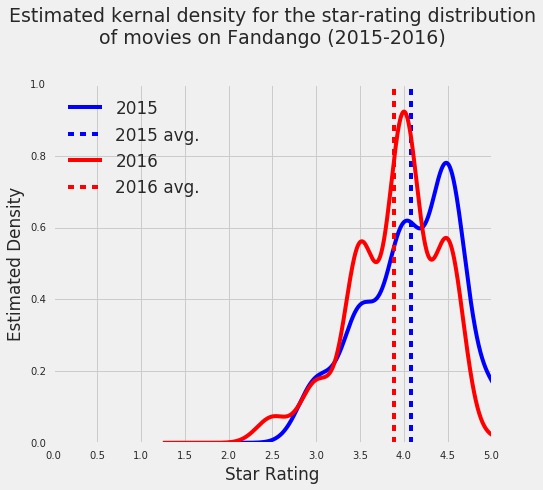

In [19]:
%matplotlib inline

plt.style.use('fivethirtyeight')
plt.figure(figsize = (7,6))

rating_2015['Fandango_Stars'].plot.kde(label = '2015', c = 'blue')
plt.axvline(x = rating_2015['Fandango_Stars'].mean(), label = '2015 avg.', linestyle = '--', color = 'blue')

rating_2016['fandango'].plot.kde(label = '2016', c = 'red')
plt.axvline(x = rating_2016['fandango'].mean(), label = '2016 avg.', linestyle = '--', color = 'red')

plt.legend(fontsize = 'large', loc = 'upper left')
plt.title('Estimated kernal density for the star-rating distribution\nof movies on Fandango (2015-2016)', 
          y = 1.1, fontdict = {'fontsize':19})

plt.xlabel('Star Rating')
plt.ylabel('Estimated Density')
plt.xlim([0,5])
plt.xticks(np.arange(0,5.5,0.5))
plt.show()


The distribution of ratings from 2015 and 2016 were similar in that they were both heavily left skewed, suggesting people might be more granular in their ratings for movies they did not like very much. Interestingly, the 2016 avg. and its overall distribution was slightly shifted to the left, suggesting the previous Fandango ratings could be rigged toward a higher value than actual.

## Comparing Relative Frequencies

Given that the number of movie ratings from 2015 **(129)** was significantly less than that of 2016 **(191)**, it did not make sense to compare the absolute frequencies. Instead, we should be focusing on relative frequencies.

***We will be describing the relative frequencies in percentages.***

In [20]:
freq_tb_2015 = pd.DataFrame(rating_2015['Fandango_Stars'].value_counts(normalize = True)*100)
freq_tb_2015.rename({'Fandango_Stars':'freq_2015 (%)'}, axis = 1, inplace = True)
freq_tb_2015

,freq_2015 (%)
4.5,37.984496
4.0,28.682171
3.5,17.829457
3.0,8.527132
5.0,6.976744


In [21]:
freq_tb_2016 =  pd.DataFrame(rating_2016['fandango'].value_counts(normalize = True)*100)
freq_tb_2016.rename({'fandango':'freq_2016 (%)'}, axis = 1, inplace = True)
freq_tb_2016

,freq_2016 (%)
4.0,40.314136
4.5,24.607330
3.5,24.083770
3.0,7.329843
2.5,3.141361
5.0,0.523560


In [22]:
freq_tb_joined = pd.merge(freq_tb_2015, freq_tb_2016, how = 'outer', left_index = True, right_index = True)
freq_tb_joined.fillna(0, inplace = True)
freq_tb_joined = freq_tb_joined.applymap(lambda x: round(x,2))
freq_tb_joined

,freq_2015 (%),freq_2016 (%)
2.5,0.00,3.14
3.0,8.53,7.33
3.5,17.83,24.08
4.0,28.68,40.31
4.5,37.98,24.61
5.0,6.98,0.52


It can be observed that:
1. In 2016, movies were rated as low as 2.5 stars, which was never seen in 2015;
2. Around 10 % movies were rated 3.0 or below for both 2015 & 2016;
3. However, in 2016 there was a clear decline in the percentages of 4.5+ stars ratings, with 5-star rating nearly disappeared.

## Determining the Direction of the Change

In [23]:
rating_only_2015 = rating_2015[['year','Fandango_Stars']].rename({'Fandango_Stars':'rating'}, axis = 1)
rating_only_2016 = rating_2016[['year','fandango']].rename({'fandango':'rating'}, axis = 1)

In [24]:
rating_only = pd.concat([rating_only_2015, rating_only_2016])
rating_only.sample(10, random_state = 1)

,year,rating
139,2015,3.0
126,2015,4.5
92,2015,4.5
2,2016,3.0
4,2016,3.0
130,2016,4.5
125,2016,4.0
98,2015,4.0
143,2016,4.5
30,2016,3.5


In [25]:
rating_stats = rating_only.groupby('year')['rating'].agg([np.mean, np.median, pd.Series.mode]).reset_index()
rating_stats

,year,mean,median,mode
0,2015,4.085271,4.0,4.5
1,2016,3.887435,4.0,4.0


In [26]:
rating_stats_long = rating_stats.melt(id_vars = 'year', value_vars = ['mean', 'median', 'mode'], var_name = 'aggregation', 
                   value_name = 'rating_statistics')
rating_stats_long

,year,aggregation,rating_statistics
0,2015,mean,4.085271
1,2016,mean,3.887435
2,2015,median,4.000000
3,2016,median,4.000000
4,2015,mode,4.500000
5,2016,mode,4.000000


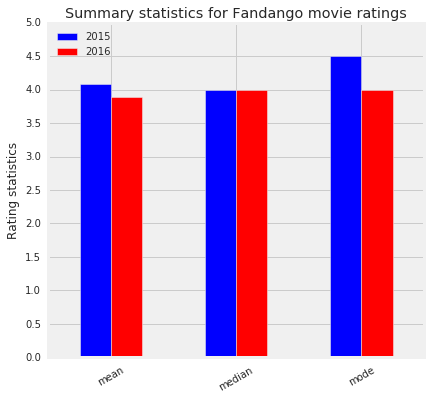

In [27]:
%matplotlib inline

stats_2015 = rating_stats_long[rating_stats_long.year == 2015].copy()
stats_2016 = rating_stats_long[rating_stats_long.year == 2016].copy()

fig, ax = plt.subplots(figsize = (6,6))
stats_2015.plot.bar(x = 'aggregation', y = 'rating_statistics',
                    label = stats_2015.year.min(), ax = ax, rot = 30,
                    color = 'blue', align = 'edge', width = -0.25)
stats_2016.plot.bar(x = 'aggregation', y = 'rating_statistics', 
                    label = stats_2016.year.min(), ax = ax, rot = 30,
                    color = 'red', align = 'edge', width = 0.25)
plt.xlim([-0.5,2.5])
plt.ylim([0,5])
plt.xlabel('')
plt.ylabel('Rating statistics')
plt.yticks(np.arange(0,5.5,0.5))
plt.title('Summary statistics for Fandango movie ratings')
